In [12]:
from matplotlib import pyplot as plt
import torch

logs = torch.load('data/logs.pt')
logs

[array([ 2.22044605e-16,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00, -2.22044605e-16,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  2.22044605e-16,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  2.22044605e-16,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00, -2.22044605e-16,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  2.22044605e-16,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -2.22044605e-16,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         2.22044605e-16,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00, -2.22044605e-16,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  2.22044605e-16,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
         1.0

In [3]:

from fairmotion.ops import conversions
len(logs)

NameError: name 'logs' is not defined

In [10]:
for log in logs:
    rotation = log[18:27].reshape(3, 3)
    euler = conversions.R2E(rotation, order='YZX', degrees=True)

[[ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -2.22044605e-16]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]]
[90. 90.  0.]


e:\mocap\fairmotion\fairmotion\ops\conversions.py:172: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  lambda x: Rotation.from_matrix(x).as_euler(order, degrees=degrees),


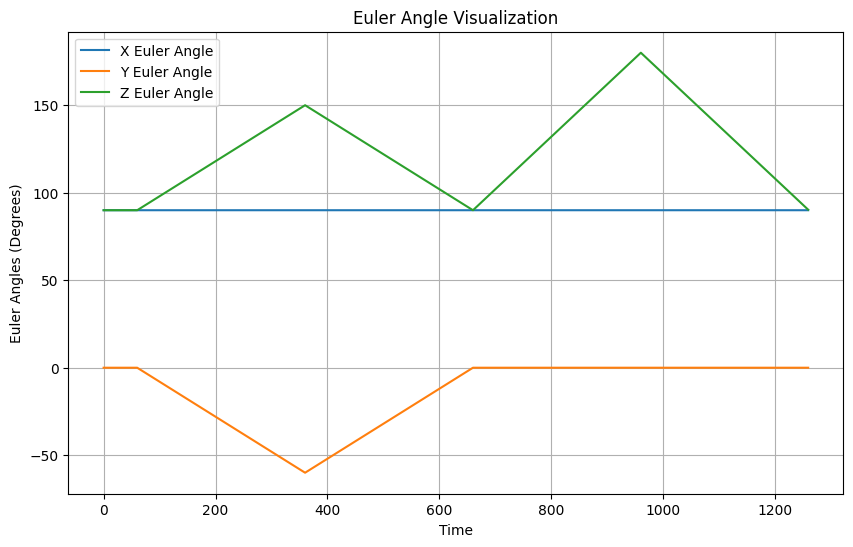

In [66]:
import matplotlib.pyplot as plt

# Assuming you have a list of Euler angles
euler_angles = []

# Your code for obtaining the Euler angles
for log in logs:
    rotation = log[18:27].reshape(3, 3)
    euler = conversions.R2E(rotation, order='xyz', degrees=True)
    euler_angles.append(euler)

# Extract X, Y, and Z Euler angles
X = [euler[0] for euler in euler_angles]
Y = [euler[1] for euler in euler_angles]
Z = [euler[2] for euler in euler_angles]

# Create a time axis (assuming time is your x-axis)
time = list(range(len(logs)))

# Create a line chart for X, Y, and Z Euler angles
plt.figure(figsize=(10, 6))
plt.plot(time, X, label='X Euler Angle')
plt.plot(time, Y, label='Y Euler Angle')
plt.plot(time, Z, label='Z Euler Angle')
plt.xlabel('Time')
plt.ylabel('Euler Angles (Degrees)')
plt.title('Euler Angle Visualization')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
import numpy as np
from fairmotion.ops import conversions
from scipy.spatial.transform import Rotation
import torch

pi = np.pi

rot = conversions.E2R([pi/4, 0, pi/3])
print(rot)
# 45, 0, 60
r = Rotation.from_matrix(rot)
euler = conversions.R2E(rot, order='xyz', degrees=False)
# euler = np.degrees(r.as_euler('xyz'))
print(euler)
print(np.round(rot - conversions.E2R(euler), 3))

[[ 0.5        -0.61237244  0.61237244]
 [ 0.8660254   0.35355339 -0.35355339]
 [ 0.          0.70710678  0.70710678]]
[ 7.85398163e-01 -2.22044605e-16  1.04719755e+00]
[[ 0.  0.  0.]
 [-0.  0.  0.]
 [-0.  0.  0.]]


In [ ]:
XYZ array([26.56505118, 37.76124391, 50.76847952])
XYZ array([63.43494882, 37.76124391, 50.76847952])
YXZ array([40.89339465, 20.70481105, 67.7923457 ])
YZX array([-0., 60., 45.])
ZXY array([60., 45.,  0.])
ZYX array([ 6.00000000e+01, -1.27222187e-14,  4.50000000e+01])

In [3]:
import numpy as np
from scipy.spatial.transform import Rotation

# Assuming you have Euler angles [x, y, z] in degrees
euler_angles = np.radians([33, 12, 44])  # Convert to radians if they are in degrees

# Create a Rotation object from the Euler angles with 'XYZ' order
r = Rotation.from_euler('xyz', euler_angles)
# Get the rotation matrix
rotation_matrix = r.as_matrix()
print(rotation_matrix)

# Create a Rotation object from the rotation matrix
r = Rotation.from_matrix(rotation_matrix)
print(r)

# Convert the rotation to Euler angles with 'XYZ' order
euler_angles = np.degrees(r.as_euler('xyz'))

# The euler_angles variable now contains the roll, pitch, and yaw in degrees
x, y, z = euler_angles
print(x, y, z)



[[ 0.7036205  -0.50113378  0.50376893]
 [ 0.67947842  0.68195003 -0.27065336]
 [-0.20791169  0.53273737  0.8203436 ]]
32.99999999999999 12.000000000000004 44.0


In [1]:
import pickle
import numpy as np

test_file = 'data/preprocessed_DIP_IMU_v1/dipimu_s_03_01.pkl'
data = pickle.load(open(test_file, "rb"))

frames = 5000
Y = data['nimble_qdq']

In [2]:
Y.shape

(16427, 114)

In [9]:
for y in Y[:100]:
    print(np.round(y, 2))

[ 0.    0.    0.95  1.2   1.22  1.22  0.02 -0.05 -0.06  0.    0.11  0.
 -0.04 -0.04  0.01 -0.06  0.03 -0.   -0.04 -0.06  0.    0.06 -0.01 -0.
  0.08 -0.   -0.37 -0.11 -0.01 -1.11  0.13 -0.14 -0.12 -0.05  0.08 -0.1
  0.15 -0.13  0.16  0.08 -0.    0.37  0.07  0.18  1.05  0.12  0.15  0.12
  0.01  0.1   0.04 -0.01 -0.07  0.01  0.03  0.1   0.05  0.    0.    0.
 -0.22  1.87  0.07  0.   -0.   -0.    0.    0.    0.   -0.   -0.    0.
 -0.    0.   -0.   -0.   -0.    0.    0.   -0.   -0.    0.   -0.   -0.
 -0.   -0.   -0.    0.   -0.   -0.   -0.    0.   -0.    0.   -0.    0.
  0.   -0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 -0.   -0.    0.    0.    0.    0.  ]
[ 0.    0.    0.95  1.18  1.24  1.25  0.   -0.04 -0.06  0.04  0.09  0.01
 -0.05 -0.09  0.01 -0.05  0.02 -0.   -0.07 -0.07  0.01  0.1  -0.02 -0.01
  0.08 -0.03 -0.38 -0.11 -0.02 -1.1   0.15 -0.15 -0.11 -0.14  0.12 -0.18
  0.28 -0.28  0.28  0.08  0.    0.37  0.05  0.15  1.04  0.21  0.17  0.12
  0.02  0.08  0.03 -0.01 -0.